In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("../Dataset/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.dropna(subset=['size','location','bath'],inplace=True)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath               0
balcony          536
price              0
dtype: int64

In [8]:
df = df.drop(["availability","society","area_type","balcony"],axis='columns')

In [9]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df['bhk'] = df['size'].apply(lambda x: x.split(' ')[0]).astype(int)
df = df.drop(['size'],axis='columns')

In [12]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df[df['bhk']> 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [14]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try: 
       float(x)
    except:
        return False
    return True 

In [16]:
df[~df['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [17]:
def convert_float_int(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df['total_sqft'] = df['total_sqft'].apply(convert_float_int)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [19]:
df['price'].head(10)

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
5     38.00
6    204.00
7    600.00
8     63.25
9    370.00
Name: price, dtype: float64

In [20]:
df.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

Feature Engineering

In [21]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df.location.unique())

1304

In [23]:
df.location = df.location.apply(lambda x: x.strip())

location_stat = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stat[location_stat<=10])

1052

In [25]:
location_stat_less_than_10 = location_stat[location_stat<=10]
location_stat_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
len(df.location.unique())

1293

In [27]:
df.location = df.location.apply(lambda x: 'other' if x in location_stat_less_than_10 else x)

len(df.location.unique())

242

Outlier Detection

In [28]:
df[df.total_sqft/df.bhk < 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [29]:
df.shape

(13246, 6)

In [30]:
df = df[~(df.total_sqft/df.bhk < 300)]
df.shape

(12502, 6)

In [31]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for keys, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [33]:
df.shape

(12502, 6)

In [34]:
df = remove_pps_outliers(df)
df.shape

(10241, 6)

In [35]:
df.head(0)

,location,total_sqft,bath,price,bhk,price_per_sqft


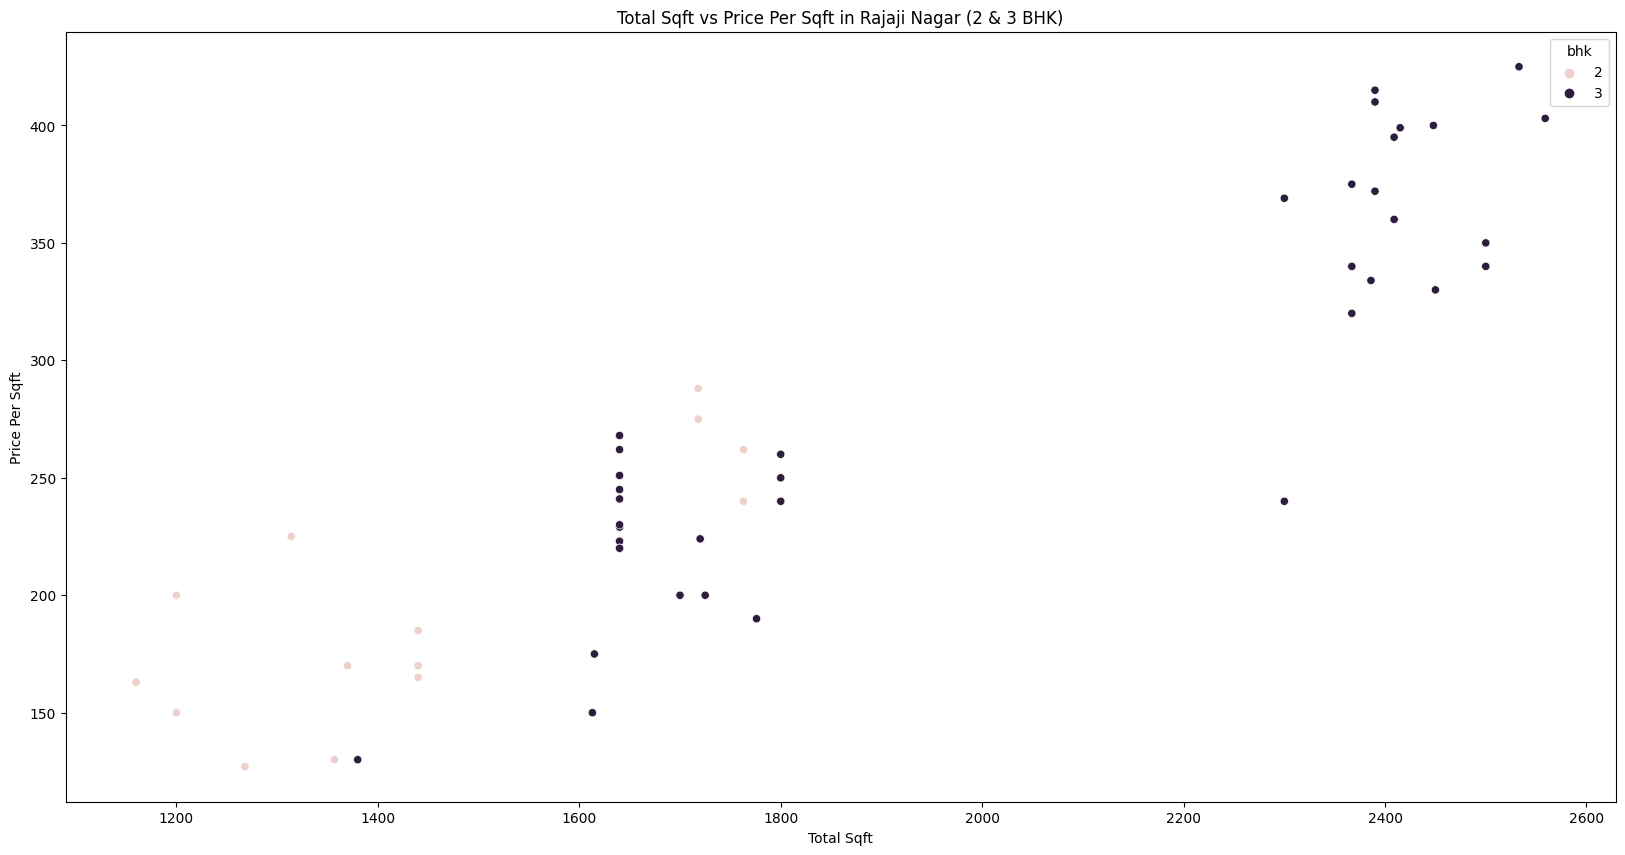

In [36]:
def plot_location_scatter(data, location):
    # Filter data by location and BHK (2 and 3)
    filtered_data = data[(data['location'] == location) & (data['bhk'].isin([2, 3]))]
    
    # Create a scatter plot
    sns.scatterplot(data=filtered_data, 
                    x='total_sqft', 
                    y='price', 
                    hue='bhk',
                    )
    
    # Title and labels
    plt.title(f"Total Sqft vs Price Per Sqft in {location} (2 & 3 BHK)")
    plt.xlabel("Total Sqft")
    plt.ylabel("Price Per Sqft")
    
    # Show the plot
    plt.show()
plot_location_scatter(df,"Rajaji Nagar")

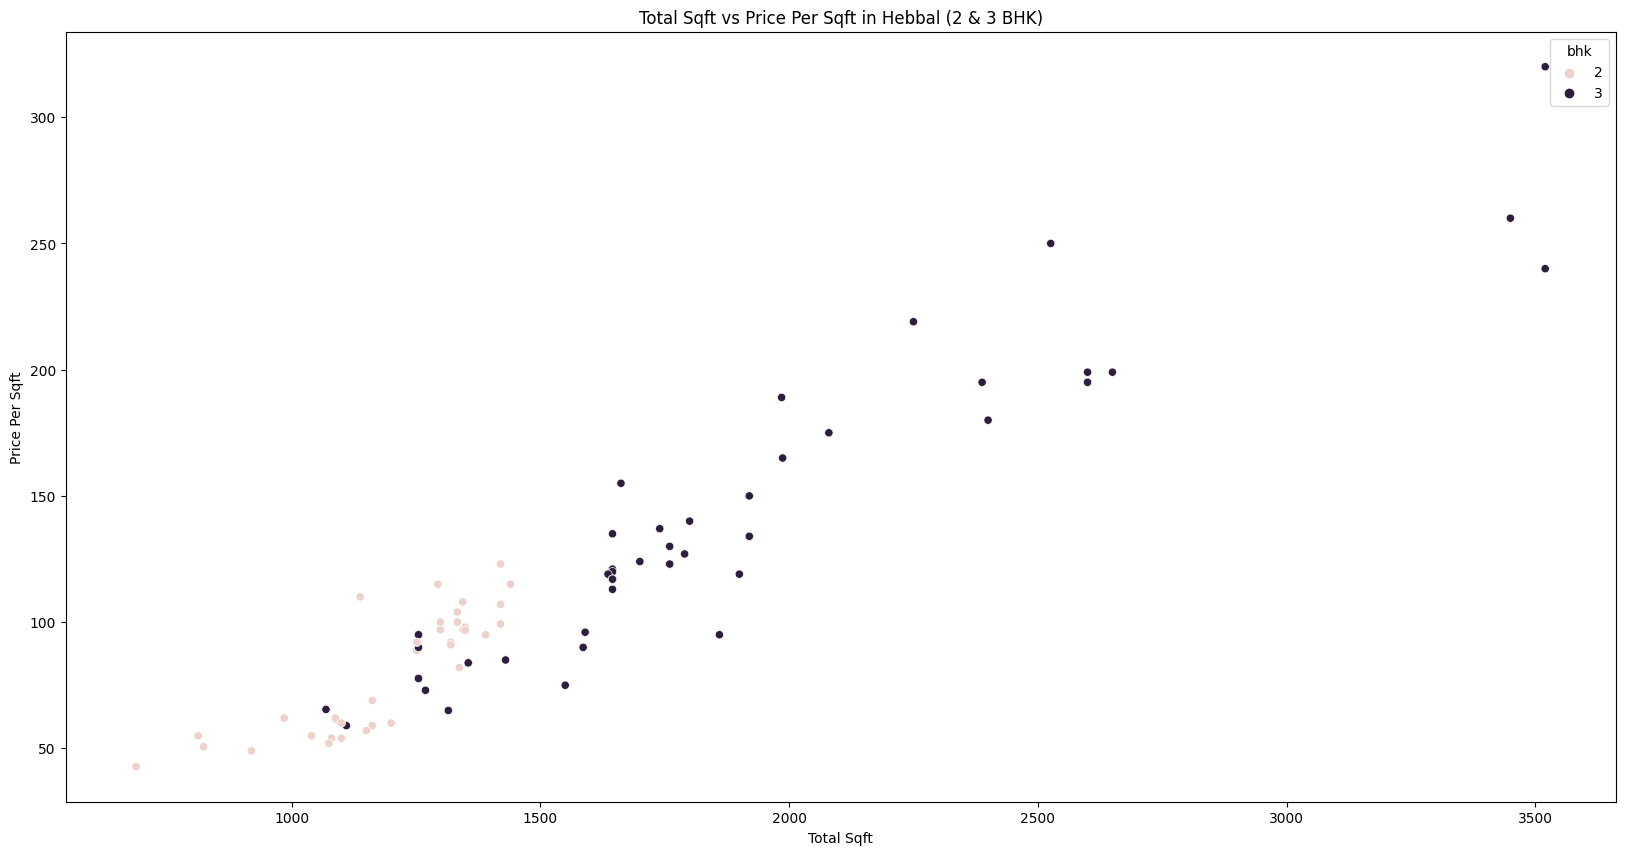

In [37]:
plot_location_scatter(df,"Hebbal")

In [38]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stat = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stat[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0],
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stat.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [39]:
df = remove_bhk_outlier(df)
df.shape

(7329, 6)

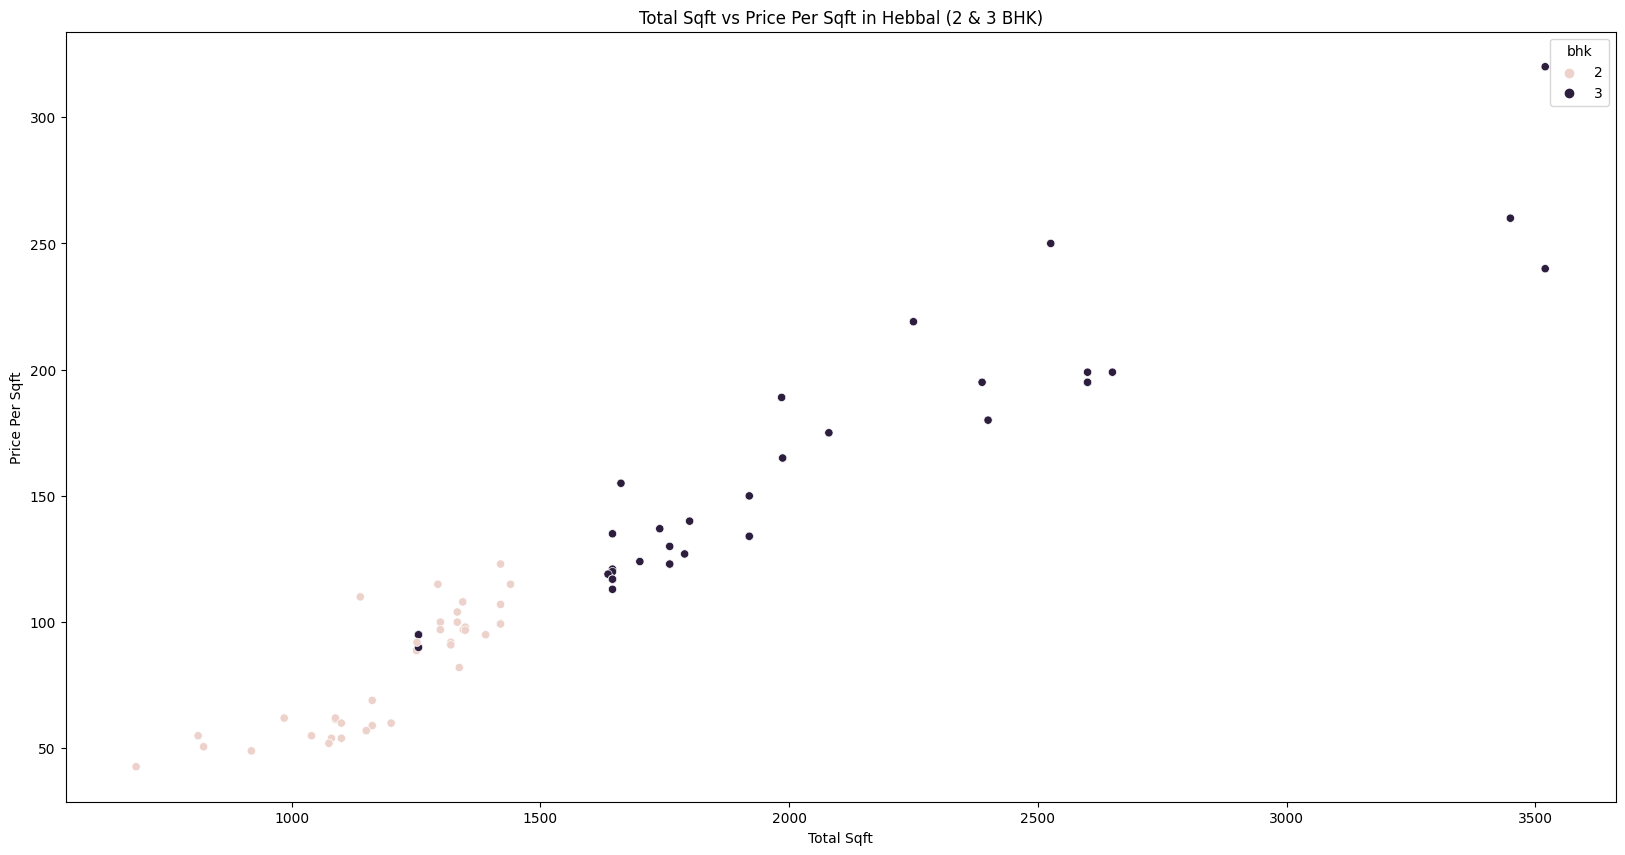

In [40]:
plot_location_scatter(df,"Hebbal")

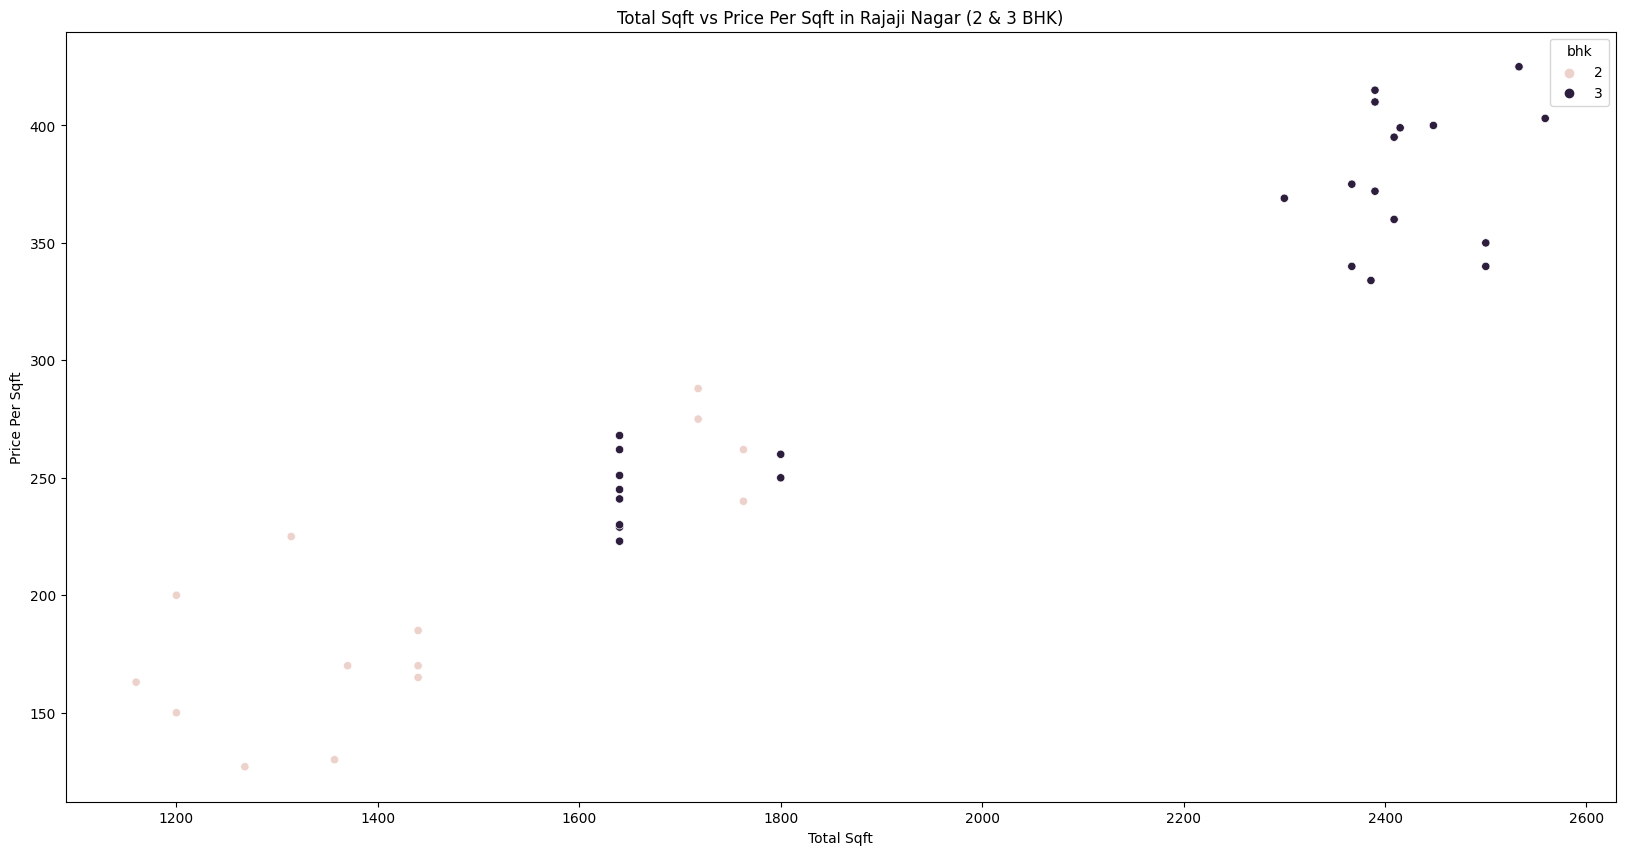

In [41]:
plot_location_scatter(df,"Rajaji Nagar")

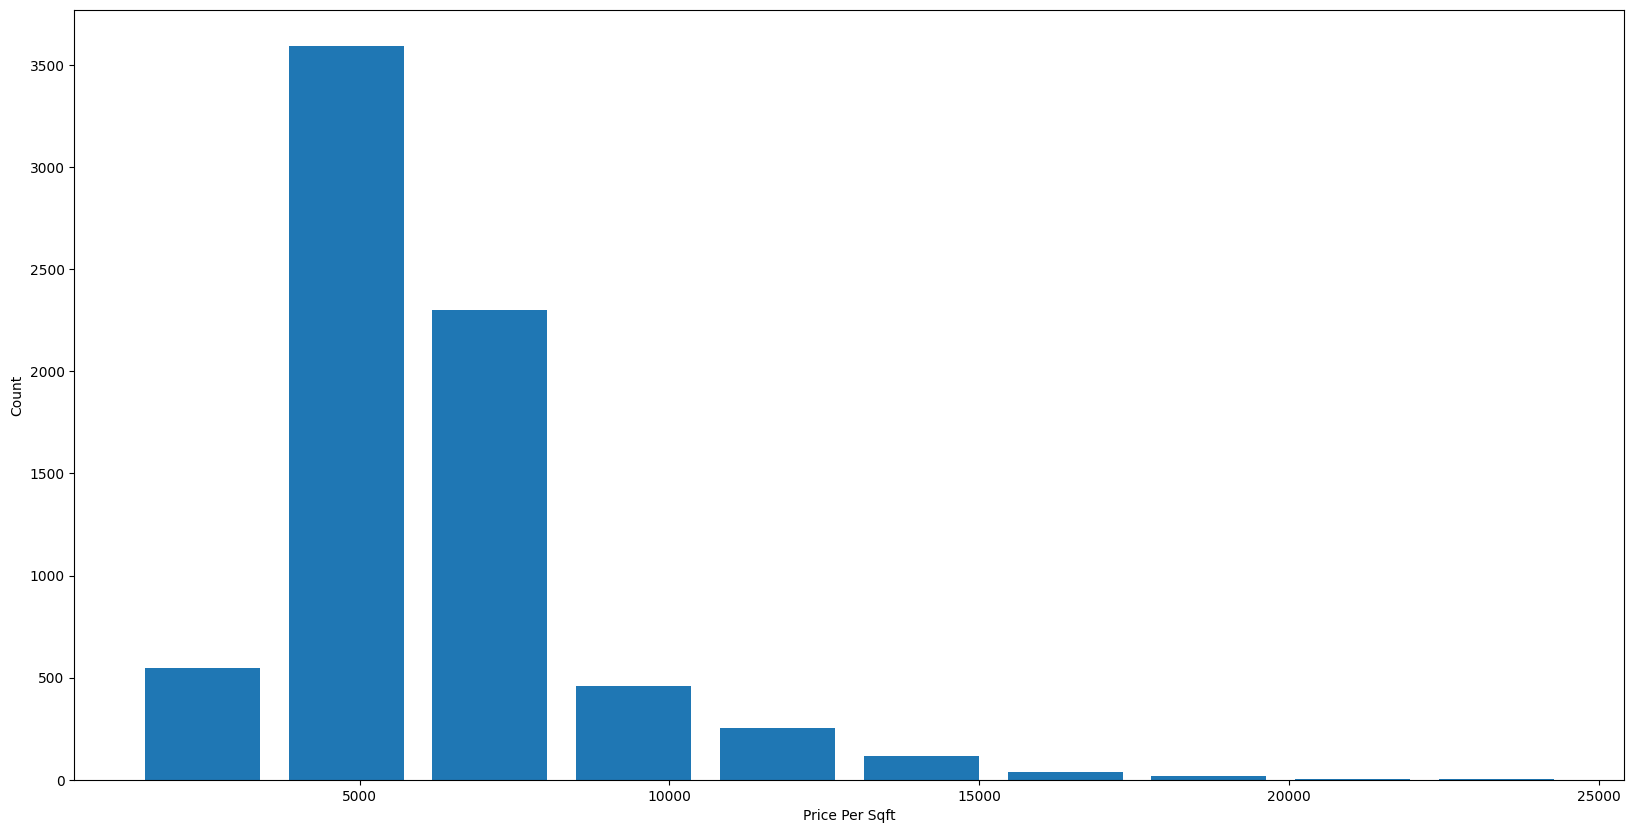

In [42]:
plt.hist(df.price_per_sqft,rwidth=.8)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show()

In [43]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df[df.bath > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

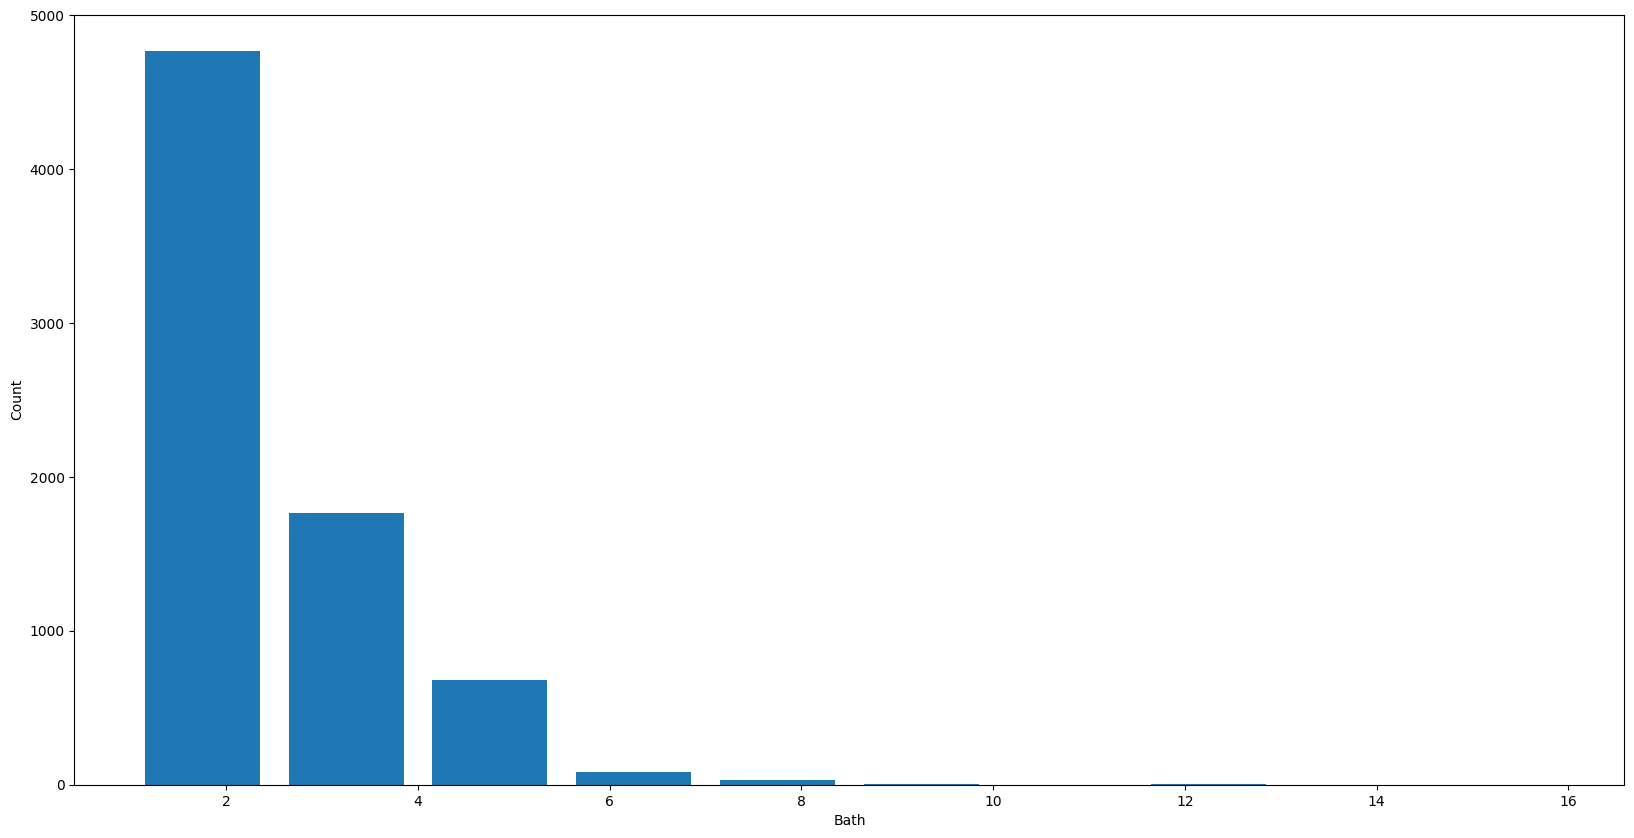

In [45]:
plt.hist(df.bath,rwidth=.8)
plt.xlabel('Bath')
plt.ylabel('Count')

In [46]:
df[df.bath > df.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df.shape

(7329, 6)

In [48]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [49]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')

In [51]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df = df.drop(['location','price_per_sqft'],axis='columns')
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.shape

(7329, 245)

In [54]:
X = df.drop('price',axis = 'columns')
y = df['price']

In [55]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7329, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [57]:
X_train.shape

(5863, 244)

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8909987705740685

In [59]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=5,test_size=.2,random_state=101)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87630323, 0.88085633, 0.88459335, 0.7830518 , 0.84049321])

In [60]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_gridsearch(X,y):
    algo = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            },
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic'],
            },
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter': ['best','random'],
            },
        }
    }
    score = []
    cv = ShuffleSplit(n_splits=5,test_size=.2,random_state=101)

    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        score.append(
            {
                'model': algo_name,
                'best_score':gs.best_score_,
                'best_params':gs.best_params_,
            }
        )
    return pd.DataFrame(score,columns=['model','best_score','best_params'])


In [61]:
# best_model_gridsearch(X,y)

In [62]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [63]:
np.where(X.columns == 'bath')[0][0]

1

In [64]:
def predict_price(location,sqft,bhk,bath):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath 
    if loc_index>=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [65]:
predict_price('1st Block Jayanagar',1000,2,2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


203.92110680042998

In [67]:
predict_price('1st Phase JP Nagar',1000,2,2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.2807480011043

In [68]:
predict_price('1st Phase JP Nagar',1000,3,3)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.75073454198812

In [69]:
import pickle
with open('banglore_price_predict.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [70]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as fp:
    fp.write(json.dumps(columns))